In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

<Figure size 3000x4000 with 0 Axes>

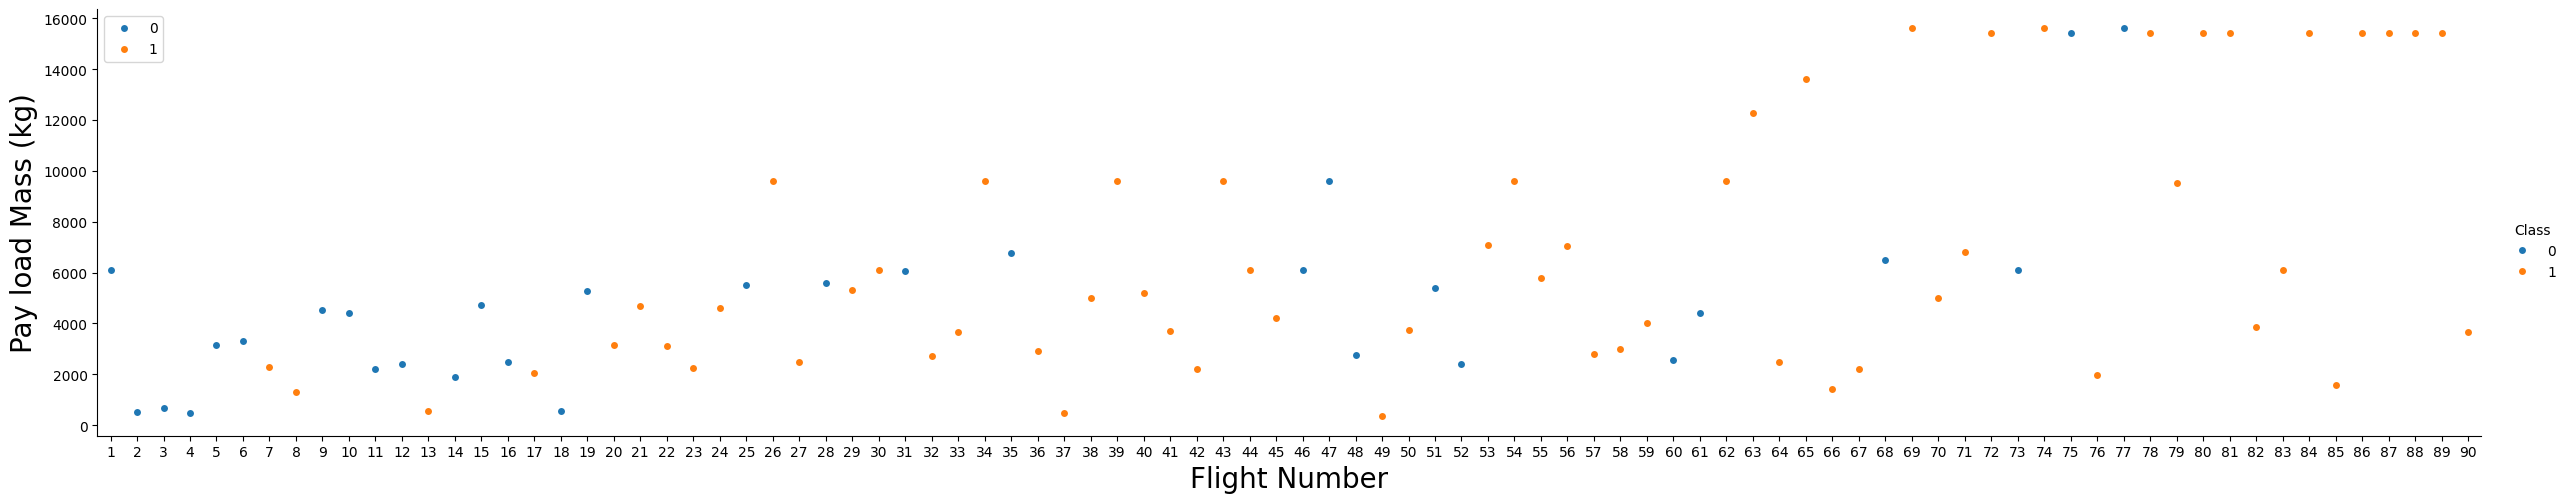

In [8]:
plt.figure(figsize=(30, 40))

sns.catplot(y="PayloadMass",x="FlightNumber",hue="Class",data=df,aspect = 5)
plt.xlabel("Flight Number",fontsize = 20)
plt.ylabel("Pay load Mass (kg)",fontsize =20)
plt.legend()
plt.show()

TASK 1: Visualize the relationship between Flight Number and Launch Site
Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

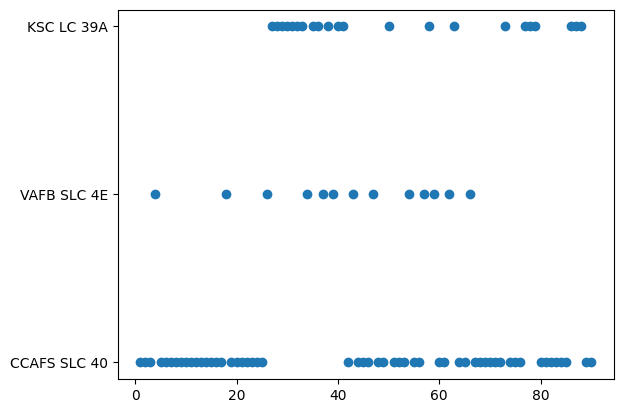

In [9]:
plt.scatter(x="FlightNumber",y = "LaunchSite",data = df)

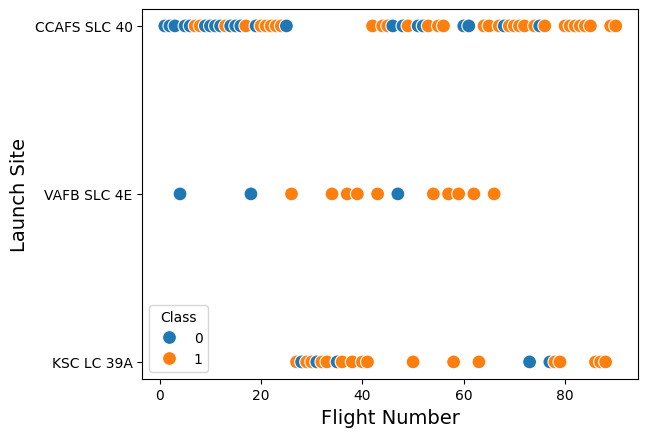

In [10]:
sns.scatterplot(
    x="FlightNumber",      # numeric flight order
    y="LaunchSite",        # categorical launch site
    hue="Class",           # success/failure
    data=df,
    s=100                  # marker size for better visibility
)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.show()


TASK 2: Visualize the relationship between Payload Mass and Launch Site
We also want to observe if there is any relationship between launch sites and their payload mass.

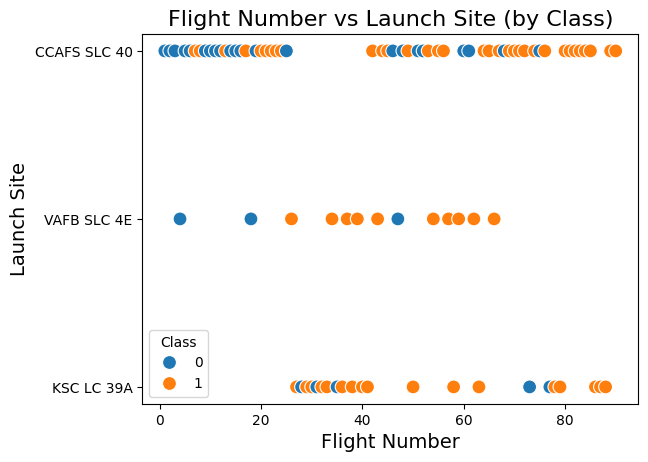

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter point chart
sns.scatterplot(
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",
    data=df,
    s=100,         # point size
    marker="o"     # circle markers
)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site (by Class)", fontsize=16)
plt.show()


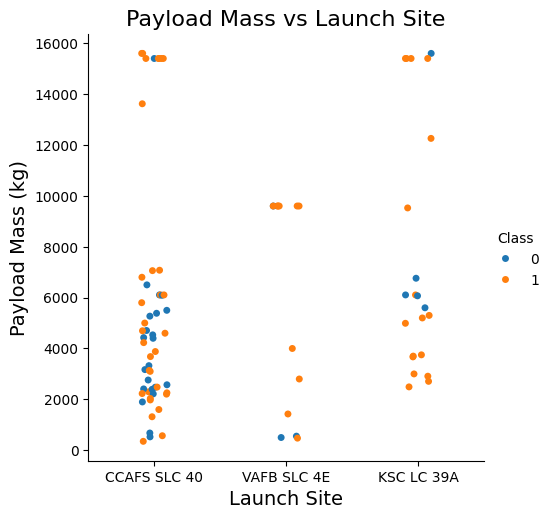

In [13]:
sns.catplot( x="LaunchSite",
    y="PayloadMass",
    hue="Class",
    data=df )
plt.xlabel("Launch Site", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.title("Payload Mass vs Launch Site", fontsize=16)
plt.show()

TASK 3: Visualize the relationship between success rate of each orbit type¶
Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a bar chart for the sucess rate of each orbit

In [15]:
success_rate = df.groupby("Orbit")["Class"].mean().reset_index()
success_rate


,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


C:\Users\PRIYANSH AGARWAL\AppData\Local\Temp\ipykernel_15164\3767226839.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Orbit",y="Class",data = success_rate,palette='viridis')


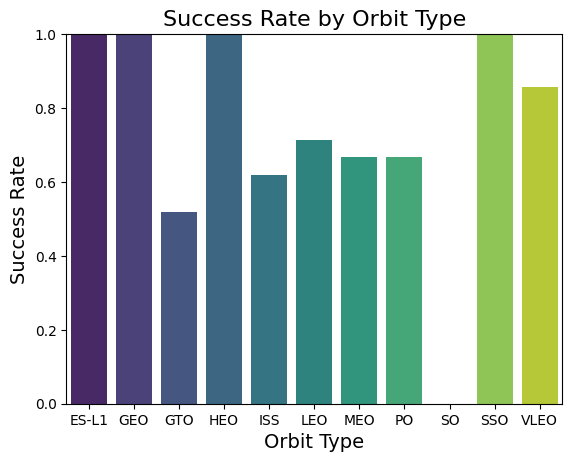

In [16]:
sns.barplot(x="Orbit",y="Class",data = success_rate,palette='viridis')
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.ylim(0, 1)  # because success rate is between 0 and 1
plt.show()

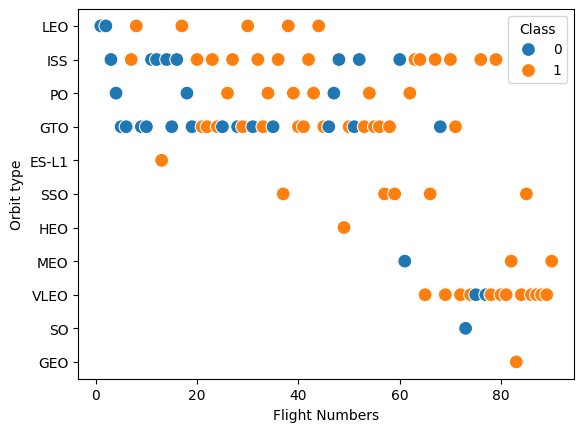

In [18]:
sns.scatterplot(
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    data=df,
    s=100
)
plt.xlabel("Flight Numbers")
plt.ylabel("Orbit type")
plt.show()

TASK 5: Visualize the relationship between Payload Mass and Orbit type¶
Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type

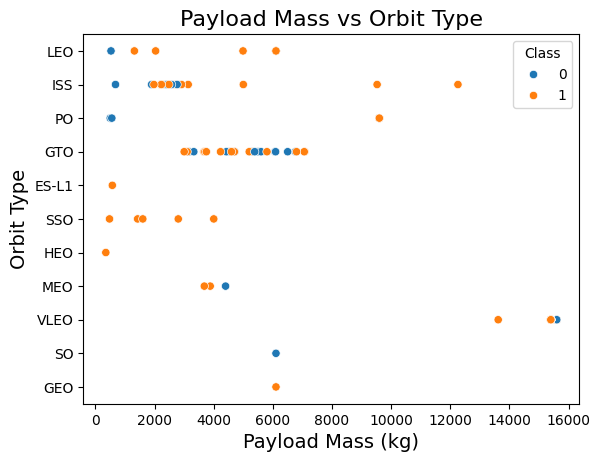

In [28]:
sns.scatterplot(x="PayloadMass",y="Orbit",hue="Class",data=df)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload Mass vs Orbit Type", fontsize=16)
plt.show()

In [29]:
year=[]
def extract_year():
    for i in df['Date']:
        year.append(i.split("-")[0])
    return year
extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [31]:
yearly_success = df.groupby('Date')['Class'].mean().reset_index()
yearly_success

,Date,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


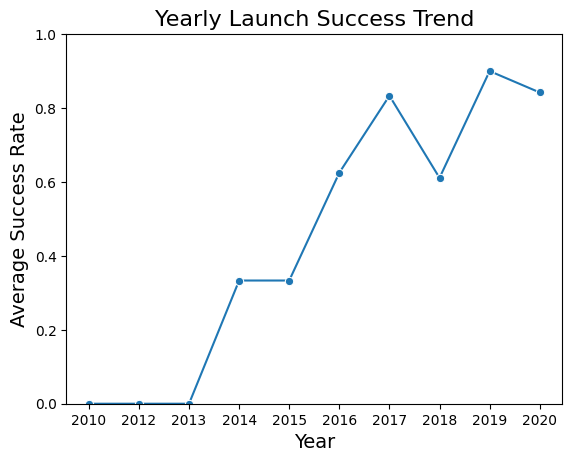

In [33]:
sns.lineplot(x="Date",y = "Class",data = yearly_success,marker='o')

plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Yearly Launch Success Trend", fontsize=16)
plt.ylim(0, 1)  # success rate between 0 and 1
plt.show()

In [34]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [38]:
features_one_hot = pd.get_dummies(features,columns=['Orbit','LaunchSite','LandingPad','Serial'])

In [39]:
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False
86,87,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,True,False,False,False
87,88,15400.000000,6,True,True,True,5.0,5,False,False,...,False,False,False,True,False,False,False,False,False,False
88,89,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False


In [43]:
features_one_hot=features_one_hot.astype('float64')

In [44]:
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)